# Data Exploration

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from scipy import stats

In [2]:
# Define the data files
brand_data_file = 'Data/brand_data_sanitised.csv'
user_data_file = 'Data/user_data_sanitised.csv'
interaction_data_file = 'Data/interaction_data_sanitised.csv'

# Import data files into dataframes
brand_dataframe = pd.read_csv(brand_data_file)
user_dataframe = pd.read_csv(user_data_file)
interaction_dataframe = pd.read_csv(interaction_data_file)

interaction_dataframe

,BRAND_ID,USER_ID,TOTAL_INTERACTIONS
0,131,1480,2
1,131,8241,1
2,131,9915,9
3,131,3948,6
4,131,8904,2
...,...,...,...
163774,43491,51549,3
163775,43493,26846,9
163776,43493,46950,2
163777,43502,48170,1


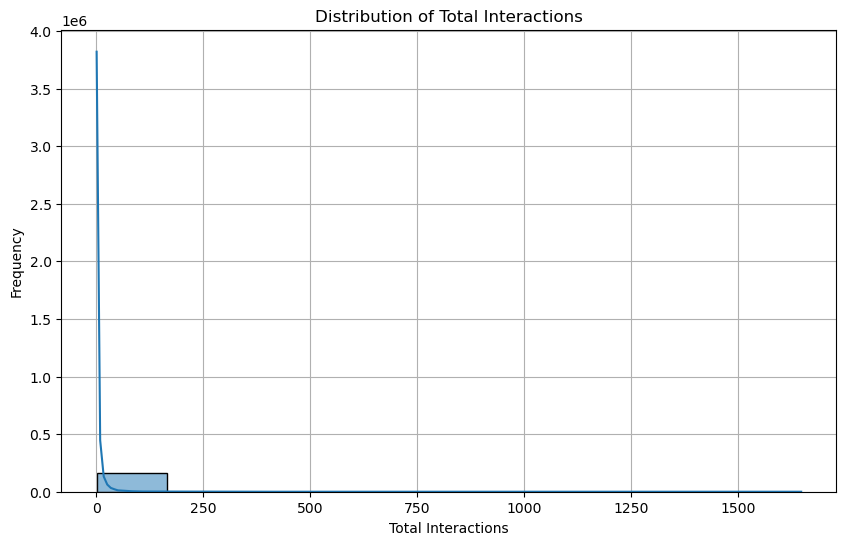

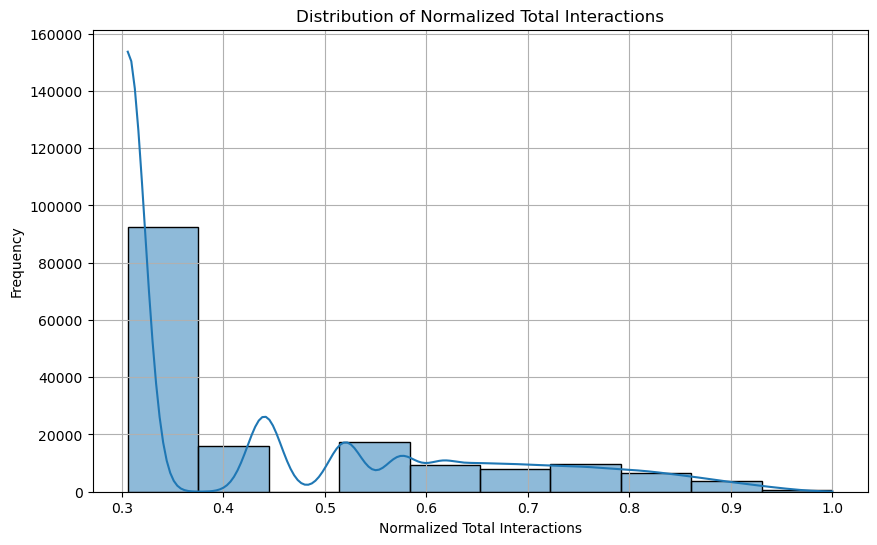

In [3]:

# Display distribution of total interactions between a user and brand
plt.figure(figsize=(10, 6))
sns.histplot(interaction_dataframe['TOTAL_INTERACTIONS'], bins=10, kde=True)
plt.title('Distribution of Total Interactions')
plt.xlabel('Total Interactions')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Apply Box-Cox transformation
total_interactions_boxcox, fitted_lambda = stats.boxcox(interaction_dataframe['TOTAL_INTERACTIONS'])

interaction_dataframe['TOTAL_INTERACTIONS_BOXCOX'] = total_interactions_boxcox

# Normalise the Box-Cox values
interaction_dataframe['TOTAL_INTERACTIONS_BOXCOX_NORMALIZED'] = MinMaxScaler().fit_transform(interaction_dataframe[['TOTAL_INTERACTIONS_BOXCOX']])

# Find the minimum non-zero value
min_non_zero_value = interaction_dataframe[interaction_dataframe['TOTAL_INTERACTIONS_BOXCOX_NORMALIZED'] > 0]['TOTAL_INTERACTIONS_BOXCOX_NORMALIZED'].min()

# Replace zero values with the minimum non-zero value
interaction_dataframe.loc[interaction_dataframe['TOTAL_INTERACTIONS_BOXCOX_NORMALIZED'] == 0, 'TOTAL_INTERACTIONS_BOXCOX_NORMALIZED'] = min_non_zero_value

# Display the distribution of transformed and normalised total interactions between a user and brand
plt.figure(figsize=(10, 6))
sns.histplot(interaction_dataframe['TOTAL_INTERACTIONS_BOXCOX_NORMALIZED'], bins=10, kde=True)
plt.title('Distribution of Normalized Total Interactions')
plt.xlabel('Normalized Total Interactions')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()